# Imports

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# df = pd.read_csv('resources/datasets/student_dropout_success.csv')
# df
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

In [2]:
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [3]:
df = pd.concat([X, y], axis=1)
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# EDA/Data Prep

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
print(df.describe())

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

In [6]:
print("Missing values in each column:")
df.isnull().sum()


Missing values in each column:


Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


### **Feature Overview and Data Description**

1.  **Demographic and Socio-Economic Profile:** This group of features describes the student's personal background and the economic environment.
    *   **Demographics:** Includes `Marital Status`, `Nacionality`, and `Age at enrollment`.
    *   **Parental Background:** `Mother's qualification`, `Father's qualification`, `Mother's occupation`, and `Father's occupation` provide insight into the student's family support system.
    *   **Economic Indicators:** `Unemployment rate`, `Inflation rate`, and `GDP` are macroeconomic features that describe the economic context during the student's enrollment.

2.  **Application and Enrollment Details:** These features describe the specifics of the student's entry into the institution and their chosen course.
    *   Includes `Application mode`, `Application order`, `Course`, and whether the student has `Daytime/evening attendance`.

3.  **Academic History and Performance:** This is a critical set of features that tracks a student's academic standing, both prior to and during their current studies.
    *   **Previous Education:** `Previous qualification` and `Previous qualification (grade)` detail the student's academic achievements before enrolling.
    *   **Current Academic Load & Performance:** A comprehensive set of features tracks progress for the first and second semesters. For each semester, we have:
        *   `Curricular units (credited)`: Units transferred from prior education.
        *   `Curricular units (enrolled)`: The number of courses the student is taking.
        *   `Curricular units (approved)`: The number of courses the student has passed.
        *   `Curricular units (grade)`: The student's average grade for the semester.
        *   These performance metrics are expected to be highly predictive of the final outcome.

4.  **The Target Variable:** This is the specific outcome we aim to predict.
    *   The **`Target`** column is a categorical variable with three possible values: **"Graduate"**, **"Dropout"**, or **"Enrolled"**. Our primary goal is to build a model that can accurately classify a student into one of these three categories based on the other features.



## Exploratory Data Analysis

### 1. Distribution of student outcomes (Graduate, Dropout, Enrolled)

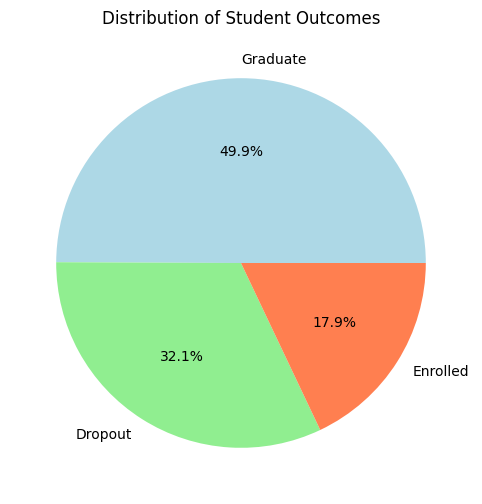

In [8]:
plt.figure(figsize=(10, 6))
target_dist = df['Target'].value_counts()
plt.pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral'])
plt.title('Distribution of Student Outcomes')

plt.show()


### 2. Demographic Analysis

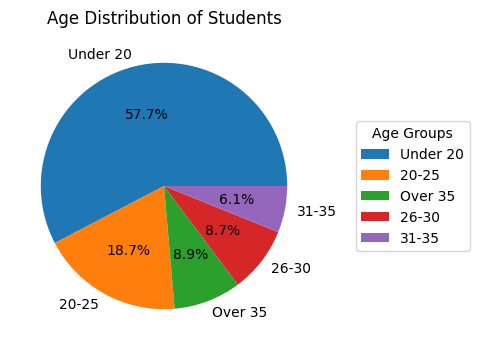

In [9]:
df['Age Category'] = pd.cut(df['Age at enrollment'], bins=[0, 20, 25, 30, 35, 100], labels=['Under 20', '20-25', '26-30', '31-35', 'Over 35'])

plt.figure(figsize=(12, 4))
age_dist = df['Age Category'].value_counts()
plt.pie(age_dist.values, labels=age_dist.index, autopct='%1.1f%%')
plt.title('Age Distribution of Students')
plt.legend(title='Age Groups', loc='center left', bbox_to_anchor=(1.1, 0.5))

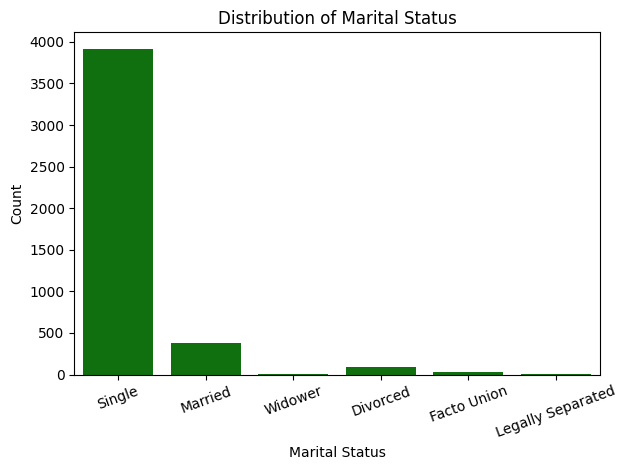

In [10]:
# Marital status mapping: 1 – single, 2 – married, 3 – widower, 4 – divorced, 5 – facto union, 6 – legally separated
marital_status_labels = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

# Map the numeric codes to descriptive labels for plotting
df['Marital Status Label'] = df['Marital Status'].map(marital_status_labels)

sns.countplot(data=df, x='Marital Status Label', color='green', order=marital_status_labels.values())
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

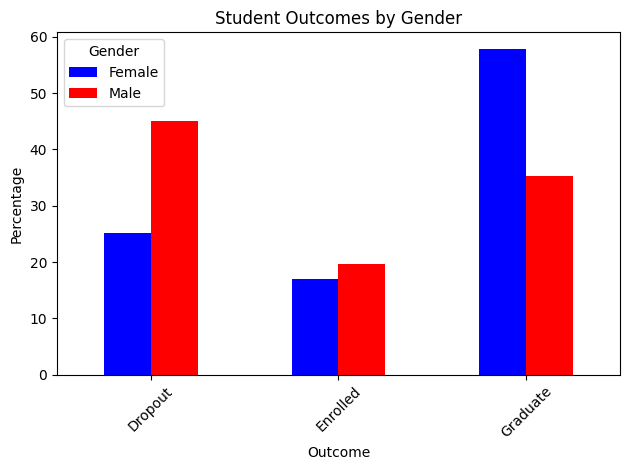

In [11]:
# Gender analysis by outcome (1=Male, 0=Female)
plt.figure(figsize=(10, 6))

gender_outcome = pd.crosstab(df['Target'], df['Gender'], normalize='columns') * 100
gender_outcome.plot(kind='bar', color=['blue', 'red'])

plt.title('Student Outcomes by Gender')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Academic Performance Analysis (grades across semesters)

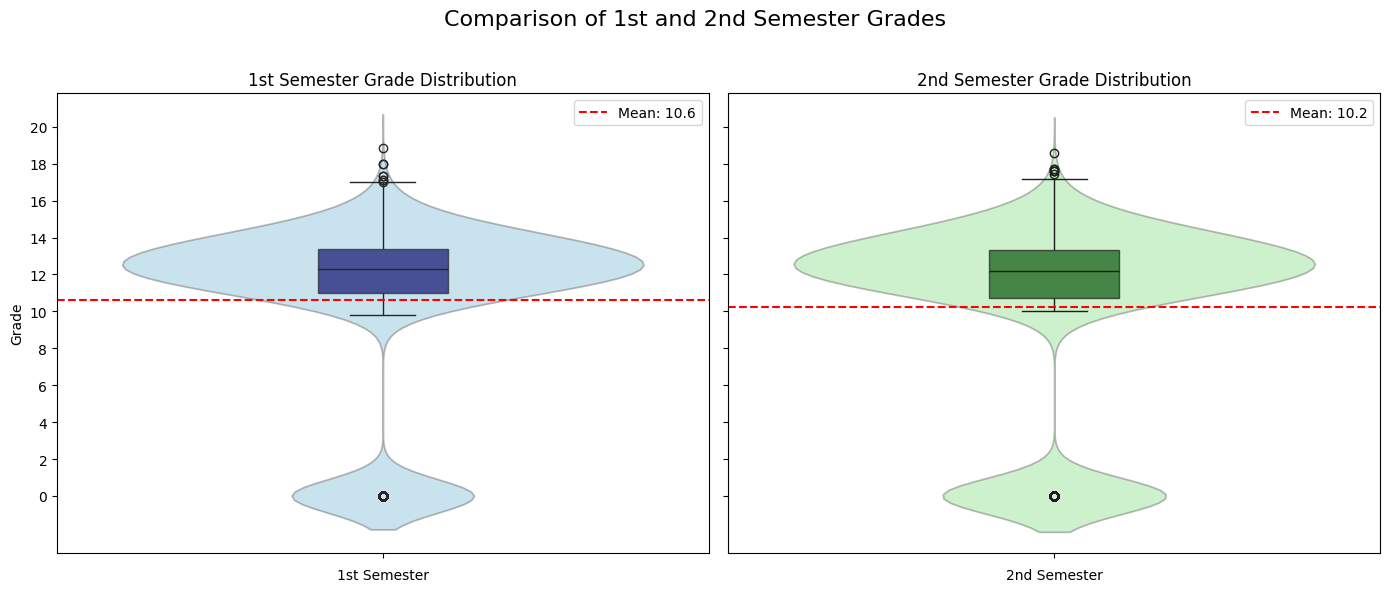

In [12]:
# Enhanced visualization: Compare 1st and 2nd semester grades side by side, add violin plots for distribution, and overlay means

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# First semester: boxplot + violinplot
sns.violinplot(ax=axes[0], data=df, y='Curricular units 1st sem (grade)', inner=None, color='skyblue', alpha=0.5)
sns.boxplot(ax=axes[0], data=df, y='Curricular units 1st sem (grade)', width=0.2, color='navy', boxprops=dict(alpha=0.7))
axes[0].set_title('1st Semester Grade Distribution')
axes[0].set_ylabel('Grade')
axes[0].set_xlabel('1st Semester')
mean1 = df['Curricular units 1st sem (grade)'].mean()
axes[0].axhline(mean1, color='red', linestyle='--', label=f"Mean: {mean1:.1f}")
axes[0].legend()

# Second semester: boxplot + violinplot
sns.violinplot(ax=axes[1], data=df, y='Curricular units 2nd sem (grade)', inner=None, color='lightgreen', alpha=0.5)
sns.boxplot(ax=axes[1], data=df, y='Curricular units 2nd sem (grade)', width=0.2, color='darkgreen', boxprops=dict(alpha=0.7))
axes[1].set_title('2nd Semester Grade Distribution')
axes[1].set_ylabel('')  # sharey
axes[1].set_xlabel('2nd Semester')
mean2 = df['Curricular units 2nd sem (grade)'].mean()
axes[1].axhline(mean2, color='red', linestyle='--', label=f"Mean: {mean2:.1f}")
axes[1].legend()

# Set y-ticks at intervals of 2 (e.g., 0, 2, 4, ...)
min_grade = min(df['Curricular units 1st sem (grade)'].min(), df['Curricular units 2nd sem (grade)'].min())
max_grade = max(df['Curricular units 1st sem (grade)'].max(), df['Curricular units 2nd sem (grade)'].max())
yticks = list(range(int(min_grade // 2 * 2), int(max_grade // 2 * 2 + 3), 2))
for ax in axes:
    ax.set_yticks(yticks)

plt.suptitle('Comparison of 1st and 2nd Semester Grades', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<Figure size 1200x600 with 0 Axes>

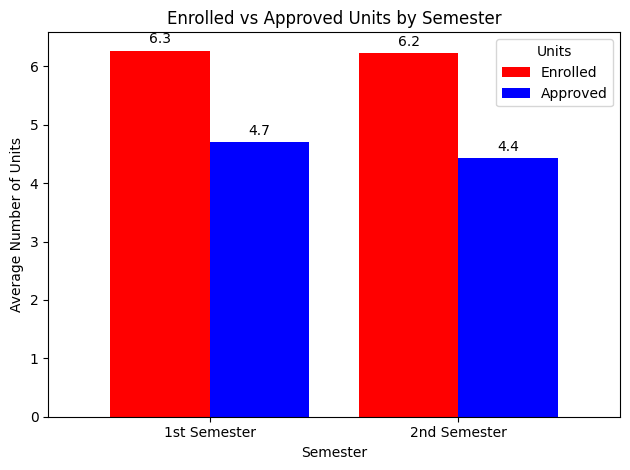

In [13]:
plt.figure(figsize=(12, 6))

data = pd.DataFrame({
    'Enrolled': [df['Curricular units 1st sem (enrolled)'].mean(), df['Curricular units 2nd sem (enrolled)'].mean()],
    'Approved': [df['Curricular units 1st sem (approved)'].mean(), df['Curricular units 2nd sem (approved)'].mean()]}, index=['1st Semester', '2nd Semester'])


ax = data.plot(kind='bar', width=0.8, color=['red', 'blue'])
plt.title('Enrolled vs Approved Units by Semester')
plt.xlabel('Semester')
plt.ylabel('Average Number of Units')
plt.legend(title='Units')
plt.xticks(rotation=0)

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()


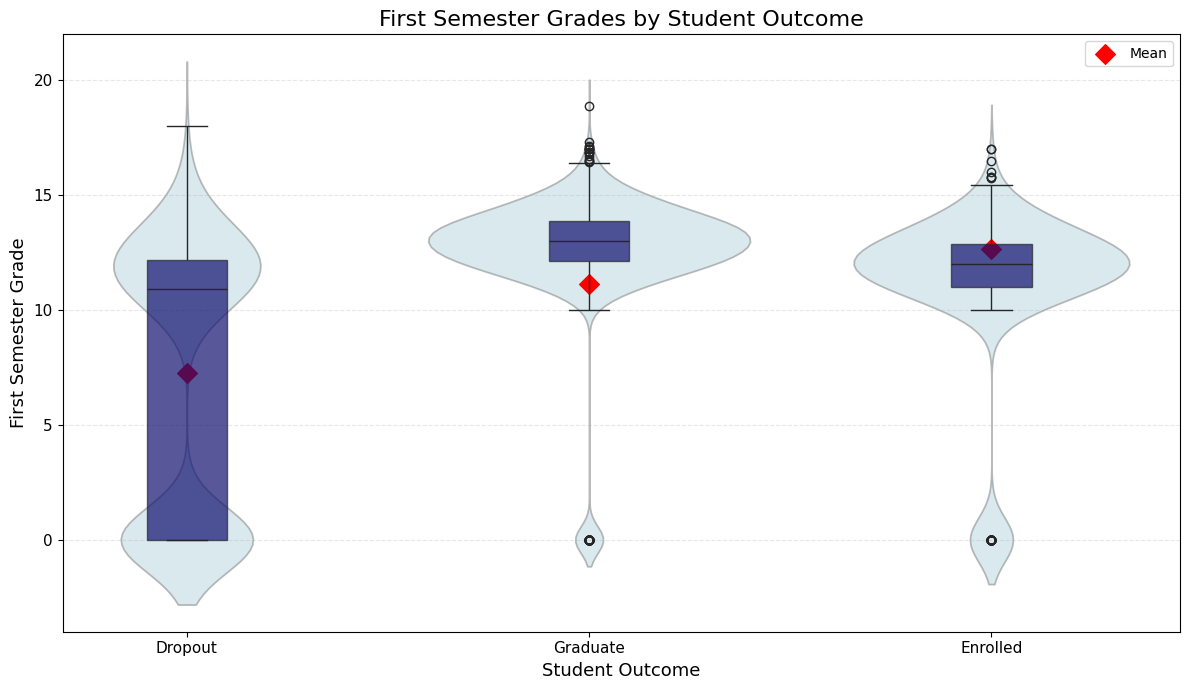

In [14]:
# Enhanced visualization: combine boxplot and violinplot, add mean markers, and improve labeling

plt.figure(figsize=(12, 7))
# Violinplot for distribution
sns.violinplot(
    data=df, x='Target', y='Curricular units 1st sem (grade)', 
    inner=None, color='lightblue', alpha=0.5
)
# Boxplot for summary statistics
sns.boxplot(
    data=df, x='Target', y='Curricular units 1st sem (grade)', 
    width=0.2, color='navy', boxprops=dict(alpha=0.7)
)

# Overlay mean markers for each group
group_means = df.groupby('Target')['Curricular units 1st sem (grade)'].mean()
for i, (target, mean) in enumerate(group_means.items()):
    plt.scatter(i, mean, color='red', s=100, marker='D', label='Mean' if i == 0 else "")

plt.title('First Semester Grades by Student Outcome', fontsize=16)
plt.xlabel('Student Outcome', fontsize=13)
plt.ylabel('First Semester Grade', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Course Enrollment Analysis

- Course IDs and Names:
- 33   - Biofuel Production Technologies
- 171  - Animation and Multimedia Design  
- 8014 - Social Service (evening attendance)
- 9003 - Agronomy
- 9070 - Communication Design
- 9085 - Veterinary Nursing
- 9119 - Informatics Engineering
- 9130 - Equinculture
- 9147 - Management
- 9238 - Social Service
- 9254 - Tourism
- 9500 - Nursing
- 9556 - Oral Hygiene
- 9670 - Advertising and Marketing Management
- 9773 - Journalism and Communication
- 9853 - Basic Education
- 9991 - Management (evening attendance)

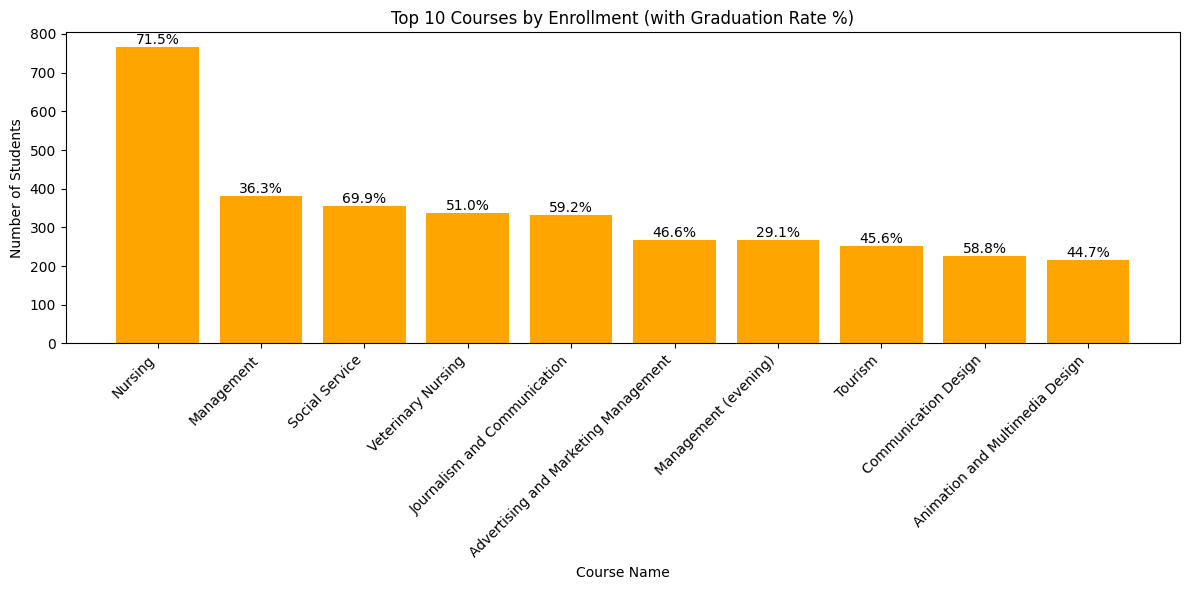

In [15]:
# Course enrollment and success rates
plt.figure(figsize=(12, 6))

# Top 10 courses 
course_counts = df['Course'].value_counts().head(10)

course_names = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening)',
    9003: 'Agronomy', 
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening)'
}

course_success = {}
for course in course_counts.index:
    course_data = df[df['Course'] == course]
    success_rate = (course_data['Target'] == 'Graduate').mean() * 100
    course_success[course] = success_rate

ax = plt.gca()
bars = plt.bar(range(len(course_counts)), course_counts.values, color='orange')

x_labels = [course_names.get(course, str(course)) for course in course_counts.index]
plt.xticks(range(len(course_counts)), x_labels, rotation=45, ha='right')

for i, bar in enumerate(bars):
    success_rate = course_success[course_counts.index[i]]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{success_rate:.1f}%',
             ha='center', va='bottom')

plt.title('Top 10 Courses by Enrollment (with Graduation Rate %)')
plt.xlabel('Course Name')
plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()


### 5. Correlation Analysis

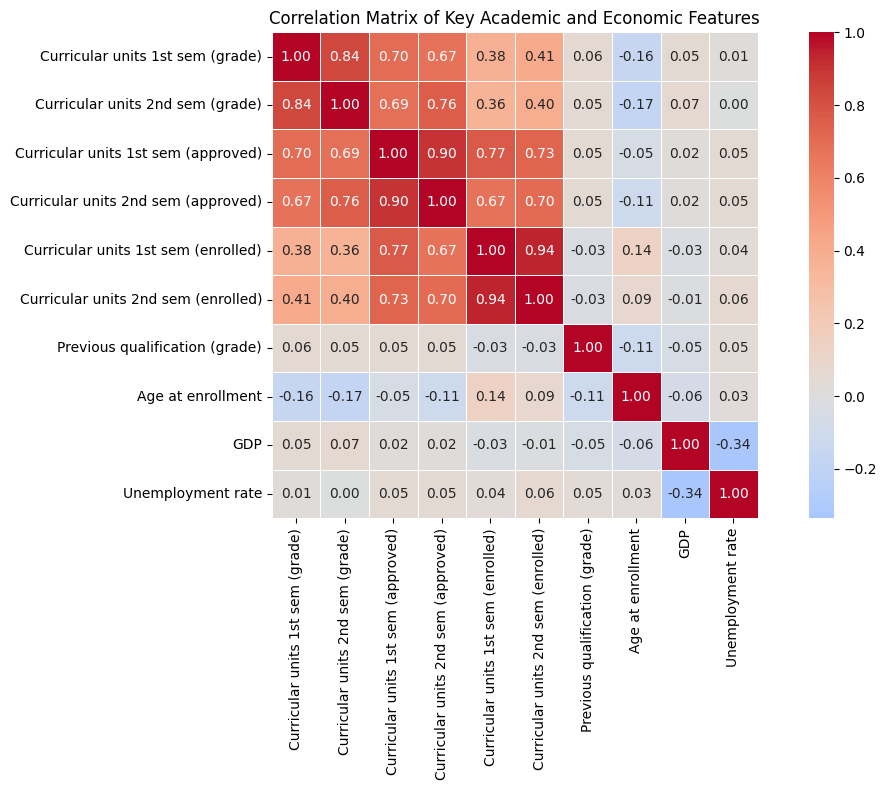

In [16]:
relevant_columns = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 2nd sem (enrolled)',
    'Previous qualification (grade)',
    'Age at enrollment',
    'GDP',
    'Unemployment rate'
]

correlation_matrix = df[relevant_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', square=True, linewidths=0.5)

plt.title('Correlation Matrix of Key Academic and Economic Features')
plt.tight_layout()
plt.show()

target_numeric = (df['Target'] == 'Graduate').astype(int)
correlations = df[relevant_columns].apply(lambda x: x.corr(target_numeric))
correlations = correlations.sort_values(ascending=False)


### 6. Family Background

##### Mother's Education

- Higher Education
- 2 - Higher Education - Bachelor's Degree
- 3 - Higher Education - Degree 
- 4 - Higher Education - Master's
- 5 - Higher Education - Doctorate
- 40 - Higher education - degree (1st cycle)
- 43 - Higher Education - Master (2nd cycle)
- 44 - Higher Education - Doctorate (3rd cycle)

- Secondary & High School
- 1 - Secondary Education - 12th Year of Schooling or Eq.
- 9 - 12th Year of Schooling - Not Completed
- 10 - 11th Year of Schooling - Not Completed
- 12 - Other - 11th Year of Schooling
- 14 - 10th Year of Schooling
- 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
- 29 - 9th Year of Schooling - Not Completed
- 27 - 2nd cycle of the general high school course

- Basic Education
- 11 - 7th Year (Old)
- 26 - 7th year of schooling
- 30 - 8th year of schooling
- 37 - Basic education 1st cycle (4th/5th year) or equiv.
- 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

- Vocational/Technical
- 18 - General commerce course
- 22 - Technical-professional course
- 39 - Technological specialization course
- 41 - Specialized higher studies course
- 42 - Professional higher technical course
- 6 - Frequency of Higher Education

- Other
- 34 - Unknown
- 35 - Can't read or write
- 36 - Can read without having a 4th year of schooling

##### Father's Education

- Higher Education
- 2 - Higher Education - Bachelor's Degree
- 3 - Higher Education - Degree
- 4 - Higher Education - Master's 
- 5 - Higher Education - Doctorate
- 6 - Frequency of Higher Education
- 40 - Higher education - degree (1st cycle)
- 41 - Specialized higher studies course
- 42 - Professional higher technical course
- 43 - Higher Education - Master (2nd cycle)
- 44 - Higher Education - Doctorate (3rd cycle)

- Secondary & High School
- 1 - Secondary Education - 12th Year of Schooling or Eq.
- 9 - 12th Year of Schooling - Not Completed
- 10 - 11th Year of Schooling - Not Completed
- 12 - Other - 11th Year of Schooling
- 13 - 2nd year complementary high school course
- 14 - 10th Year of Schooling
- 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
- 20 - Complementary High School Course
- 25 - Complementary High School Course - not concluded
- 27 - 2nd cycle of the general high school course
- 29 - 9th Year of Schooling - Not Completed

- Basic Education
- 11 - 7th Year (Old)
- 26 - 7th year of schooling
- 30 - 8th year of schooling
- 37 - Basic education 1st cycle (4th/5th year) or equiv.
- 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

- Vocational/Technical
- 18 - General commerce course
- 22 - Technical-professional course
- 31 - General Course of Administration and Commerce
- 33 - Supplementary Accounting and Administration
- 39 - Technological specialization course

- Other
- 34 - Unknown
- 35 - Can't read or write
- 36 - Can read without having a 4th year of schooling

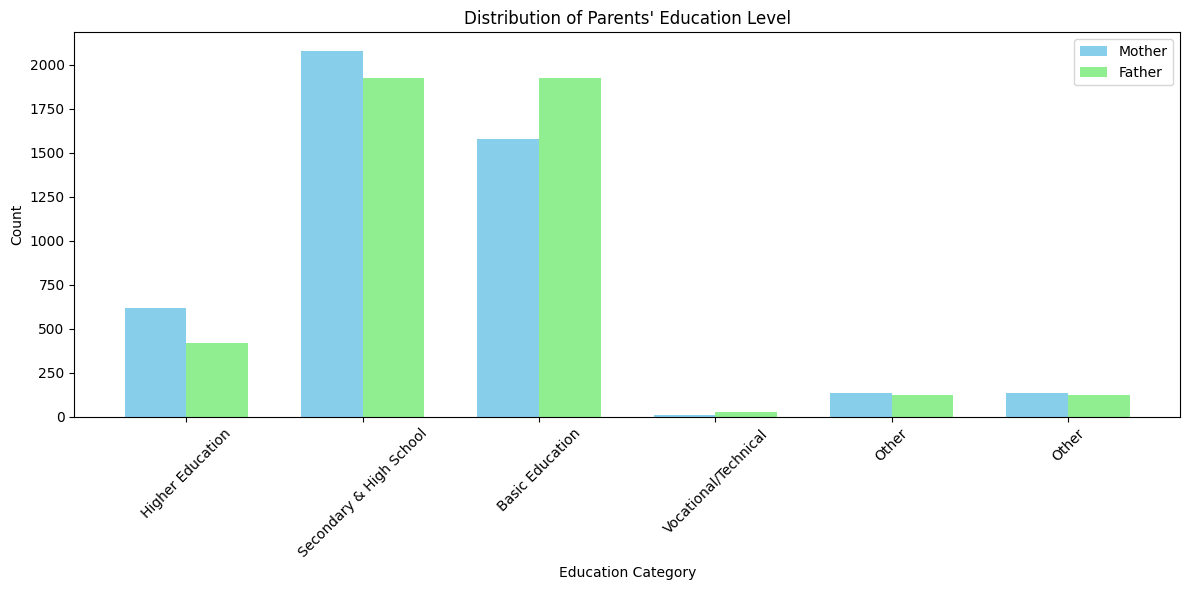

In [17]:
education_categories = {
    'Higher Education': [2, 3, 4, 5, 6, 40, 41, 42, 43, 44],
    'Secondary & High School': [1, 9, 10, 12, 13, 14, 19, 20, 25, 27, 29],
    'Basic Education': [11, 26, 30, 37, 38],
    'Vocational/Technical': [18, 22, 31, 33, 39],
    'Other': [34, 35, 36]
}

def categorize_education(code):
    for category, codes in education_categories.items():
        if code in codes:
            return category
    return 'Other'

df['Mother_Education_Category'] = df["Mother's qualification"].apply(categorize_education)
df['Father_Education_Category'] = df["Father's qualification"].apply(categorize_education)

plt.figure(figsize=(12, 6))

mother_counts = df['Mother_Education_Category'].value_counts()
father_counts = df['Father_Education_Category'].value_counts()

categories = list(education_categories.keys()) + ['Other']
x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, [mother_counts.get(cat, 0) for cat in categories], width, label='Mother', color='skyblue')
plt.bar(x + width/2, [father_counts.get(cat, 0) for cat in categories], width, label='Father', color='lightgreen')

plt.xlabel('Education Category')
plt.ylabel('Count')
plt.title('Distribution of Parents\' Education Level')
plt.xticks(x, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

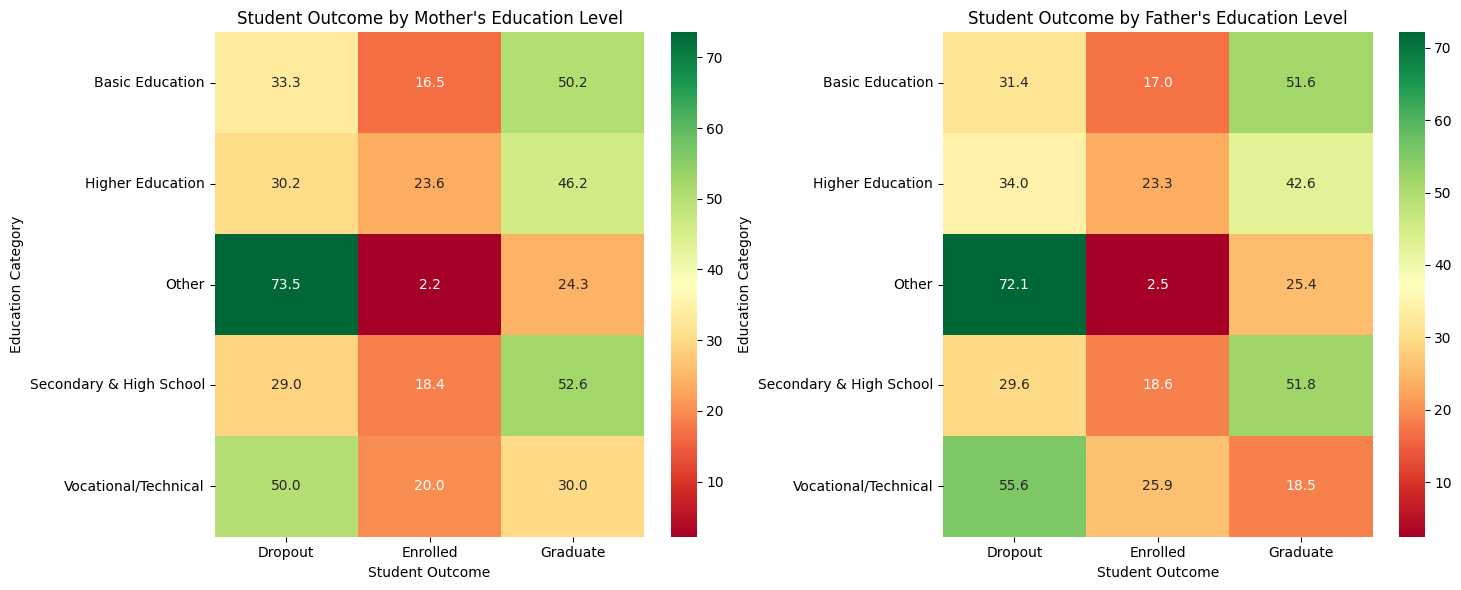

In [18]:
# Convert Target to binary (Graduate = 1, Dropout = 0)
df['Target_Binary'] = (df['Target'] == 'Graduate').astype(int)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for i, parent in enumerate(['Mother', 'Father']):
    cont_table = pd.crosstab(df[f'{parent}_Education_Category'], df['Target'])
    chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
    
    pct_data = cont_table.div(cont_table.sum(axis=1), axis=0) * 100

    ax = ax1 if i == 0 else ax2
    sns.heatmap(pct_data, annot=True, fmt='.1f', cmap='RdYlGn', ax=ax)
    ax.set_title(f'Student Outcome by {parent}\'s Education Level')
    ax.set_xlabel('Student Outcome')
    ax.set_ylabel('Education Category')

plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

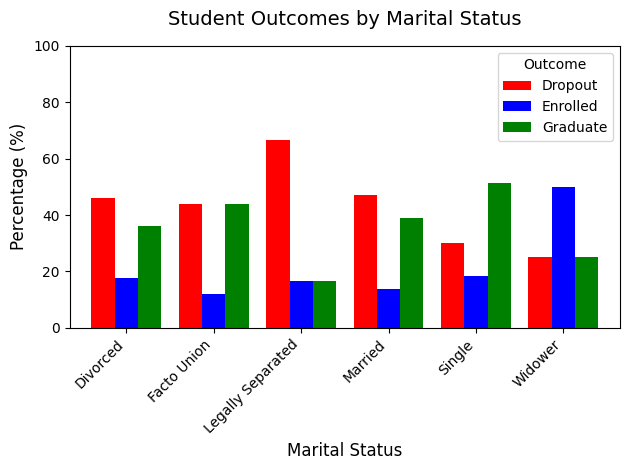

In [19]:
df_marital = df.copy()
df_marital['Marital_status'] = df_marital['Marital Status'].map({
    1: 'Single', 
    2: 'Married', 
    3: 'Widower', 
    4: 'Divorced', 
    5: 'Facto Union', 
    6: 'Legally Separated'
})

percentage_table = pd.crosstab(
    df_marital['Marital_status'], 
    df_marital['Target'], 
    normalize='index'
) * 100


plt.figure(figsize=(10, 6))

ax = percentage_table.plot(kind='bar', width=0.8, color=['red', 'blue', 'green'])

plt.title('Student Outcomes by Marital Status', fontsize=14, pad=15)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Outcome')
plt.ylim(0, 100)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 8. Scholarship Factors

<Figure size 800x550 with 0 Axes>

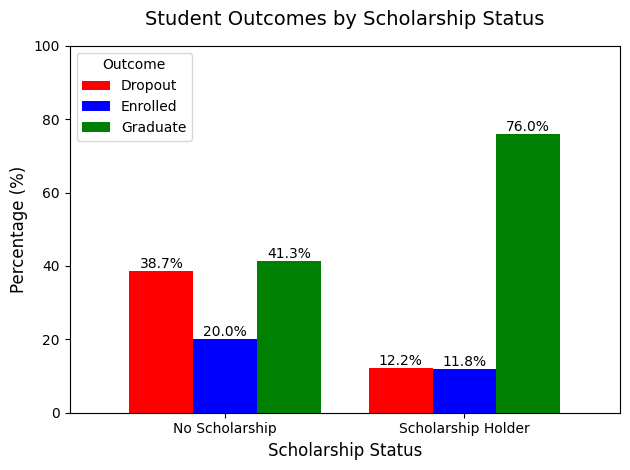

In [20]:
scholarship_outcomes = pd.crosstab(df['Scholarship holder'], df['Target'], normalize='index') * 100

scholarship_map = {0: 'No Scholarship', 1: 'Scholarship Holder'}
df['Scholarship_Status'] = df['Scholarship holder'].map(scholarship_map)

percentage_table = pd.crosstab(df['Scholarship_Status'], df['Target'], normalize='index') * 100

plt.figure(figsize=(8, 5.5))

ax = percentage_table.plot(kind='bar', width=0.8, color=['red', 'blue', 'green'])

plt.title('Student Outcomes by Scholarship Status', fontsize=14, pad=15)
plt.xlabel('Scholarship Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Outcome')
plt.ylim(0, 100)

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Chi Squared Test

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

table = pd.crosstab(df['Scholarship holder'], df['Target'])
print("\nContingency Table:")
print(table)

chi2, p_value, dof, expected = chi2_contingency(table)

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=table.index, columns=table.columns).round(2))

alpha = 0.05
print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant association between being a scholarship holder and the target outcome.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant association between being a scholarship holder and the target outcome.")


Contingency Table:
Target              Dropout  Enrolled  Graduate
Scholarship holder                             
0                      1287       664      1374
1                       134       130       835

Expected Frequencies:
Target              Dropout  Enrolled  Graduate
Scholarship holder                             
0                    1068.0    596.76   1660.25
1                     353.0    197.24    548.75

Chi-squared statistic: 409.9431
P-value: 0.0000
Since the p-value (0.0000) is less than 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant association between being a scholarship holder and the target outcome.


T test

In [22]:
scholarship_grades = df[df['Scholarship holder'] == 1]['Curricular units 1st sem (grade)']
no_scholarship_grades = df[df['Scholarship holder'] == 0]['Curricular units 1st sem (grade)']

t_stat, p_value_ttest = ttest_ind(scholarship_grades, no_scholarship_grades, nan_policy='omit')

print("\nAverage grades:")
print(f"Scholarship students: {scholarship_grades.mean():.2f}")
print(f"Non-scholarship students: {no_scholarship_grades.mean():.2f}")

print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4f}")

if p_value_ttest < alpha:
    print(f"p-value ({p_value_ttest:.4f}) is less than {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant difference in the average first semester grades between scholarship and non-scholarship students.")
else:
    print(f"p-value ({p_value_ttest:.4f}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the average first semester grades between scholarship and non-scholarship students.")


Average grades:
Scholarship students: 12.06
Non-scholarship students: 10.17

T-statistic: 11.3552
P-value: 0.0000
p-value (0.0000) is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in the average first semester grades between scholarship and non-scholarship students.


## Key Insights from Exploratory Data Analysis

### Data Quality
- The dataset is complete with no missing values across all 37 columns
- Contains 4,424 student records with various academic and demographic features

### Student Demographics
- Age distribution shows most students enroll between ages 18-23, with some mature students
- Marital status analysis reveals:
  - Single students form the largest group
  - Married students tend to have higher graduation rates
  - Divorced and widowed students show more varied outcomes

### Academic Performance Patterns
- Strong correlation between first and second semester performance metrics
- Students with higher grades in both semesters are more likely to graduate
- Number of enrolled and approved units shows clear impact on graduation likelihood

### Scholarship Factor
- Scholarship status shows notable impact on academic outcomes:
- Scholarship holders have higher graduation rates
- Scholarship appears to provide meaningful support for student success



# Feature Engineering

In [23]:
# Implement comprehensive feature engineering as per features.md
import warnings
warnings.filterwarnings('ignore')

print("Starting Feature Engineering...")
print("="*50)

# Create a copy for feature engineering
df_features = df.copy()

# 1. DEMOGRAPHIC FEATURES
print("1. Creating Demographic Features...")

# Is_Single: Binary feature for single marital status
df_features['Is_Single'] = (df_features['Marital Status'] == 1).astype(int)

# Age_Group: Categorize students into age groups
def categorize_age(age):
    if age < 20:
        return 1
    elif 20 <= age <= 25:
        return 2
    else:
        return 3

df_features['Age_Group'] = df_features['Age at enrollment'].apply(categorize_age)

# Parents_Higher_Education: Binary feature for parents with higher education
# Higher education codes: 2, 3, 4, 5, 6, 40, 41, 42, 43, 44
higher_ed_codes = [2, 3, 4, 5, 6, 40, 41, 42, 43, 44]
df_features['Parents_Higher_Education'] = (
    (df_features["Mother's qualification"].isin(higher_ed_codes)) | 
    (df_features["Father's qualification"].isin(higher_ed_codes))
).astype(int)

# Parents_Skilled_Occupation: Binary feature for skilled occupations
# Skilled occupations: specialists (2), technicians (3), managers (1)
skilled_occupations = [1, 2, 3]
df_features['Parents_Skilled_Occupation'] = (
    (df_features["Mother's occupation"].isin(skilled_occupations)) | 
    (df_features["Father's occupation"].isin(skilled_occupations))
).astype(int)

print(f"   - Is_Single: {df_features['Is_Single'].sum()} single students")
print(f"   - Age_Group distribution: {df_features['Age_Group'].value_counts().to_dict()}")
print(f"   - Parents_Higher_Education: {df_features['Parents_Higher_Education'].sum()} students")
print(f"   - Parents_Skilled_Occupation: {df_features['Parents_Skilled_Occupation'].sum()} students")

# 2. APPLICATION FEATURES
print("\n2. Creating Application Features...")

# Is_First_Choice: Binary feature for first choice applications
df_features['Is_First_Choice'] = (df_features['Application order'] <= 1).astype(int)

# Application_Mode_Group: Group application modes into broader categories
def group_application_mode(mode):
    if mode in [1, 17, 18]:
        return 'General Contingent'
    elif mode in [2, 5, 16]:
        return 'Special Contingent'
    elif mode in [15, 57]:
        return 'International/Foreign'
    elif mode == 39:
        return 'Mature/23+'
    elif mode in [42, 43, 44, 51, 53]:
        return 'Transfer/Change'
    elif mode in [7, 10, 26, 27]:
        return 'Other Ordinances'
    else:
        return 'Other'

df_features['Application_Mode_Group'] = df_features['Application mode'].apply(group_application_mode)

print(f"   - Is_First_Choice: {df_features['Is_First_Choice'].sum()} first choice applications")
print(f"   - Application_Mode_Group distribution:")
for group, count in df_features['Application_Mode_Group'].value_counts().items():
    print(f"     {group}: {count}")

# 3. ACADEMIC BACKGROUND FEATURES
print("\n3. Creating Academic Background Features...")

# Previous_Qualification_Group: Group previous qualifications
def group_previous_qualification(qual):
    if qual in [1, 9]:
        return 'Secondary'
    elif qual in [2, 3, 4, 5, 6, 40, 43]:
        return 'Higher Education'
    elif qual in [19, 38]:
        return 'Basic Education'
    elif qual in [10, 15]:
        return 'Incomplete'
    else:
        return 'Other'

df_features['Previous_Qualification_Group'] = df_features['Previous qualification'].apply(group_previous_qualification)

# Admission_vs_Previous_Grade: Difference between admission and previous grade
df_features['Admission_vs_Previous_Grade'] = (
    df_features['Admission grade'] - df_features['Previous qualification (grade)']
)

print(f"   - Previous_Qualification_Group distribution:")
for group, count in df_features['Previous_Qualification_Group'].value_counts().items():
    print(f"     {group}: {count}")
print(f"   - Admission_vs_Previous_Grade mean: {df_features['Admission_vs_Previous_Grade'].mean():.2f}")

# 4. ACADEMIC PERFORMANCE FEATURES
print("\n4. Creating Academic Performance Features...")

# Pass rates with division by zero handling
def safe_divide(numerator, denominator):
    return np.where(denominator == 0, 0, numerator / denominator)

# 1st_Sem_Pass_Rate
df_features['1st_Sem_Pass_Rate'] = safe_divide(
    df_features['Curricular units 1st sem (approved)'],
    df_features['Curricular units 1st sem (enrolled)']
)

# 2nd_Sem_Pass_Rate
df_features['2nd_Sem_Pass_Rate'] = safe_divide(
    df_features['Curricular units 2nd sem (approved)'],
    df_features['Curricular units 2nd sem (enrolled)']
)

# Overall_Pass_Rate
total_approved = (df_features['Curricular units 1st sem (approved)'] + 
                 df_features['Curricular units 2nd sem (approved)'])
total_enrolled = (df_features['Curricular units 1st sem (enrolled)'] + 
                 df_features['Curricular units 2nd sem (enrolled)'])
df_features['Overall_Pass_Rate'] = safe_divide(total_approved, total_enrolled)

# Grade_Progression: Change in grade from 1st to 2nd semester
df_features['Grade_Progression'] = (
    df_features['Curricular units 2nd sem (grade)'] - 
    df_features['Curricular units 1st sem (grade)']
)

# Total_Approved_Units
df_features['Total_Approved_Units'] = (
    df_features['Curricular units 1st sem (approved)'] + 
    df_features['Curricular units 2nd sem (approved)']
)

# Dropout_Risk_Indicator: Based on non-evaluation
df_features['Dropout_Risk_Indicator'] = (
    (df_features['Curricular units 1st sem (without evaluations)'] > 0) | 
    (df_features['Curricular units 2nd sem (without evaluations)'] > 0)
).astype(int)

print(f"   - 1st_Sem_Pass_Rate mean: {df_features['1st_Sem_Pass_Rate'].mean():.3f}")
print(f"   - 2nd_Sem_Pass_Rate mean: {df_features['2nd_Sem_Pass_Rate'].mean():.3f}")
print(f"   - Overall_Pass_Rate mean: {df_features['Overall_Pass_Rate'].mean():.3f}")
print(f"   - Grade_Progression mean: {df_features['Grade_Progression'].mean():.3f}")
print(f"   - Total_Approved_Units mean: {df_features['Total_Approved_Units'].mean():.1f}")
print(f"   - Dropout_Risk_Indicator: {df_features['Dropout_Risk_Indicator'].sum()} students at risk")

# 5. FINANCIAL AND SUPPORT FEATURES
print("\n5. Creating Financial and Support Features...")

# Has_Financial_Issue: Debtor OR tuition fees not up to date
df_features['Has_Financial_Issue'] = (
    (df_features['Debtor'] == 1) | 
    (df_features['Tuition fees up to date'] == 0)
).astype(int)

# Receives_Support: Scholarship holder OR educational special needs
df_features['Receives_Support'] = (
    (df_features['Scholarship holder'] == 1) | 
    (df_features['Educational special needs'] == 1)
).astype(int)

print(f"   - Has_Financial_Issue: {df_features['Has_Financial_Issue'].sum()} students")
print(f"   - Receives_Support: {df_features['Receives_Support'].sum()} students")

# 6. INTERACTION FEATURES
print("\n6. Creating Interaction Features...")

# Age_x_Admission_Grade: Interaction between age and admission grade
df_features['Age_x_Admission_Grade'] = (
    df_features['Age at enrollment'] * df_features['Admission grade']
)

# GDP_x_Unemployment: Interaction between GDP and unemployment rate
df_features['GDP_x_Unemployment'] = (
    df_features['GDP'] * df_features['Unemployment rate']
)

print(f"   - Age_x_Admission_Grade mean: {df_features['Age_x_Admission_Grade'].mean():.1f}")
print(f"   - GDP_x_Unemployment mean: {df_features['GDP_x_Unemployment'].mean():.1f}")

print("\n" + "="*50)
print("Feature Engineering Complete!")
print(f"Original features: {df.shape[1]}")
print(f"Total features after engineering: {df_features.shape[1]}")
print(f"New features added: {df_features.shape[1] - df.shape[1]}")

# Display the new features summary
new_features = [
    'Is_Single', 'Age_Group', 'Parents_Higher_Education', 'Parents_Skilled_Occupation',
    'Is_First_Choice', 'Application_Mode_Group', 'Previous_Qualification_Group', 
    'Admission_vs_Previous_Grade', '1st_Sem_Pass_Rate', '2nd_Sem_Pass_Rate', 
    'Overall_Pass_Rate', 'Grade_Progression', 'Total_Approved_Units', 
    'Dropout_Risk_Indicator', 'Has_Financial_Issue', 'Receives_Support',
    'Age_x_Admission_Grade', 'GDP_x_Unemployment'
]

print(f"\nNew features created: {len(new_features)}")
for i, feature in enumerate(new_features, 1):
    print(f"{i:2d}. {feature}")

df_features.head()
#

Starting Feature Engineering...
1. Creating Demographic Features...
   - Is_Single: 3919 single students
   - Age_Group distribution: {1: 1952, 2: 1427, 3: 1045}
   - Parents_Higher_Education: 793 students
   - Parents_Skilled_Occupation: 1127 students

2. Creating Application Features...
   - Is_First_Choice: 3027 first choice applications
   - Application_Mode_Group distribution:
     General Contingent: 2704
     Mature/23+: 785
     Transfer/Change: 696
     Other Ordinances: 151
     Special Contingent: 57
     International/Foreign: 31

3. Creating Academic Background Features...
   - Previous_Qualification_Group distribution:
     Secondary: 3728
     Other: 301
     Higher Education: 220
     Basic Education: 169
     Incomplete: 6
   - Admission_vs_Previous_Grade mean: -5.64

4. Creating Academic Performance Features...
   - 1st_Sem_Pass_Rate mean: 0.698
   - 2nd_Sem_Pass_Rate mean: 0.660
   - Overall_Pass_Rate mean: 0.679
   - Grade_Progression mean: -0.411
   - Total_Approve

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,1st_Sem_Pass_Rate,2nd_Sem_Pass_Rate,Overall_Pass_Rate,Grade_Progression,Total_Approved_Units,Dropout_Risk_Indicator,Has_Financial_Issue,Receives_Support,Age_x_Admission_Grade,GDP_x_Unemployment
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,2546.0,18.792
1,1,15,1,9254,1,1,160.0,1,1,3,...,1.000000,1.000000,1.000000,-0.333333,12,0,1,0,2707.5,10.981
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0.000000,0.000000,0.000000,0,0,1,0,2371.2,18.792
3,1,17,2,9773,1,1,122.0,1,38,37,...,1.000000,0.833333,0.916667,-1.028571,11,0,0,0,2392.0,-29.328
4,2,39,1,8014,0,1,100.0,1,37,38,...,0.833333,1.000000,0.916667,0.666667,11,0,0,0,6367.5,10.981


# Machine Learning

In [24]:
# Import ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           f1_score, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import time

print("="*60)
print("MACHINE LEARNING PIPELINE IMPLEMENTATION")
print("="*60)

# 1. DATA PREPARATION FOR MACHINE LEARNING
print("\n1. DATA PREPARATION")
print("-" * 30)

# Remove EDA-specific columns that are not needed for ML
columns_to_drop = ['Age Category', 'Marital Status Label', 'Mother_Education_Category', 
                   'Father_Education_Category', 'Target_Binary', 'Marital_status', 
                   'Scholarship_Status']

# Check which columns exist and drop them
existing_columns_to_drop = [col for col in columns_to_drop if col in df_features.columns]
if existing_columns_to_drop:
    df_ml = df_features.drop(columns=existing_columns_to_drop)
    print(f"Dropped {len(existing_columns_to_drop)} EDA-specific columns")
else:
    df_ml = df_features.copy()

print(f"Dataset shape: {df_ml.shape}")

# Prepare categorical features that need encoding
categorical_features = ['Application_Mode_Group', 'Previous_Qualification_Group']

# One-hot encode categorical features
df_ml_encoded = pd.get_dummies(df_ml, columns=categorical_features, prefix=categorical_features)
print(f"Shape after categorical encoding: {df_ml_encoded.shape}")

# Separate features and target
X = df_ml_encoded.drop('Target', axis=1)
y = df_ml_encoded['Target']

print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Encode target variable: Dropout=0, Enrolled=1, Graduate=2
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Target encoding: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

# Feature scaling for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")
print(f"Training set mean: {X_train_scaled.mean():.6f}, std: {X_train_scaled.std():.6f}")
print("Data preparation completed!")

# Store feature names for later use
feature_names = X.columns.tolist()
print(f"Total features for modeling: {len(feature_names)}")

# Convert scaled data back to DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

MACHINE LEARNING PIPELINE IMPLEMENTATION

1. DATA PREPARATION
------------------------------
Dropped 6 EDA-specific columns
Dataset shape: (4424, 55)
Shape after categorical encoding: (4424, 64)
Features shape: (4424, 63)
Target distribution: {'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794}
Target encoding: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
Training set: (3539, 63)
Test set: (885, 63)
Training target distribution: [1137  635 1767]
Test target distribution: [284 159 442]
Feature scaling completed
Training set mean: -0.000000, std: 1.000000
Data preparation completed!
Total features for modeling: 63


In [ ]:
# 2. MODEL TRAINING AND HYPERPARAMETER TUNING
print("\n2. MODEL TRAINING AND HYPERPARAMETER TUNING")
print("-" * 50)

# Initialize models with their parameter grids for GridSearchCV
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        },
        'use_scaled': True
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        },
        'use_scaled': False
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'max_features': ['sqrt', 'log2'],
            'min_samples_split': [2, 5]
        },
        'use_scaled': False
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        },
        'use_scaled': False
    },
    'MLP Classifier': {
        'model': MLPClassifier(random_state=42, max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        },
        'use_scaled': True
    }
}

# Store trained models and results
trained_models = {}
model_results = {}

print("Training models with GridSearchCV (5-fold cross-validation)...")
print("This may take a few minutes...\n")

for model_name, model_config in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    
    # Choose appropriate data (scaled or unscaled)
    if model_config['use_scaled']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train.values
        X_test_model = X_test.values
    
    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(
        model_config['model'],
        model_config['params'],
        cv=5,
        scoring='f1_macro',  # Use macro F1-score for multiclass
        n_jobs=-1,
        verbose=0
    )
    
    # Fit the model
    grid_search.fit(X_train_model, y_train)
    
    # Store the best model
    trained_models[model_name] = grid_search.best_estimator_
    
    # Make predictions
    y_pred = grid_search.predict(X_test_model)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    
    # Store results
    model_results[model_name] = {
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'predictions': y_pred,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    training_time = time.time() - start_time
    
    print(f"   ✓ Completed in {training_time:.1f}s")
    print(f"   Best CV Score (F1-macro): {grid_search.best_score_:.4f}")
    print(f"   Test Accuracy: {accuracy:.4f}")
    print(f"   Test F1-macro: {f1_macro:.4f}")
    print(f"   Best Parameters: {grid_search.best_params_}")
    print()

print("All models trained successfully!")
print("="*50)



2. MODEL TRAINING AND HYPERPARAMETER TUNING
--------------------------------------------------
Training models with GridSearchCV (5-fold cross-validation)...
This may take a few minutes...

Training Logistic Regression...
   ✓ Completed in 2.6s
   Best CV Score (F1-macro): 0.6853
   Test Accuracy: 0.7751
   Test F1-macro: 0.6903
   Best Parameters: {'C': 1, 'solver': 'lbfgs'}

Training Decision Tree...
   ✓ Completed in 0.9s
   Best CV Score (F1-macro): 0.6897
   Test Accuracy: 0.7706
   Test F1-macro: 0.7028
   Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

Training Random Forest...
   ✓ Completed in 10.9s
   Best CV Score (F1-macro): 0.7080
   Test Accuracy: 0.7819
   Test F1-macro: 0.7052
   Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

Training Gradient Boosting...


# Model Evaluation and Comparisons


3. MODEL EVALUATION AND COMPARISON
--------------------------------------------------
📊 PERFORMANCE COMPARISON TABLE
                     cv_score  accuracy  f1_macro  f1_weighted  \
Logistic Regression    0.6853    0.7751    0.6903       0.7588   
Decision Tree          0.6897    0.7706    0.7028       0.7621   
Random Forest          0.7080    0.7819    0.7052       0.7686   
Gradient Boosting      0.7104    0.7638    0.6988       0.7579   
MLP Classifier         0.6575    0.6927    0.6241       0.6922   

                     precision_macro  recall_macro  
Logistic Regression           0.7210        0.6829  
Decision Tree                 0.7184        0.6949  
Random Forest                 0.7329        0.6956  
Gradient Boosting             0.7091        0.6924  
MLP Classifier                0.6252        0.6232  

🏆 BEST MODEL: Random Forest
   F1-macro Score: 0.7052
   Accuracy: 0.7819


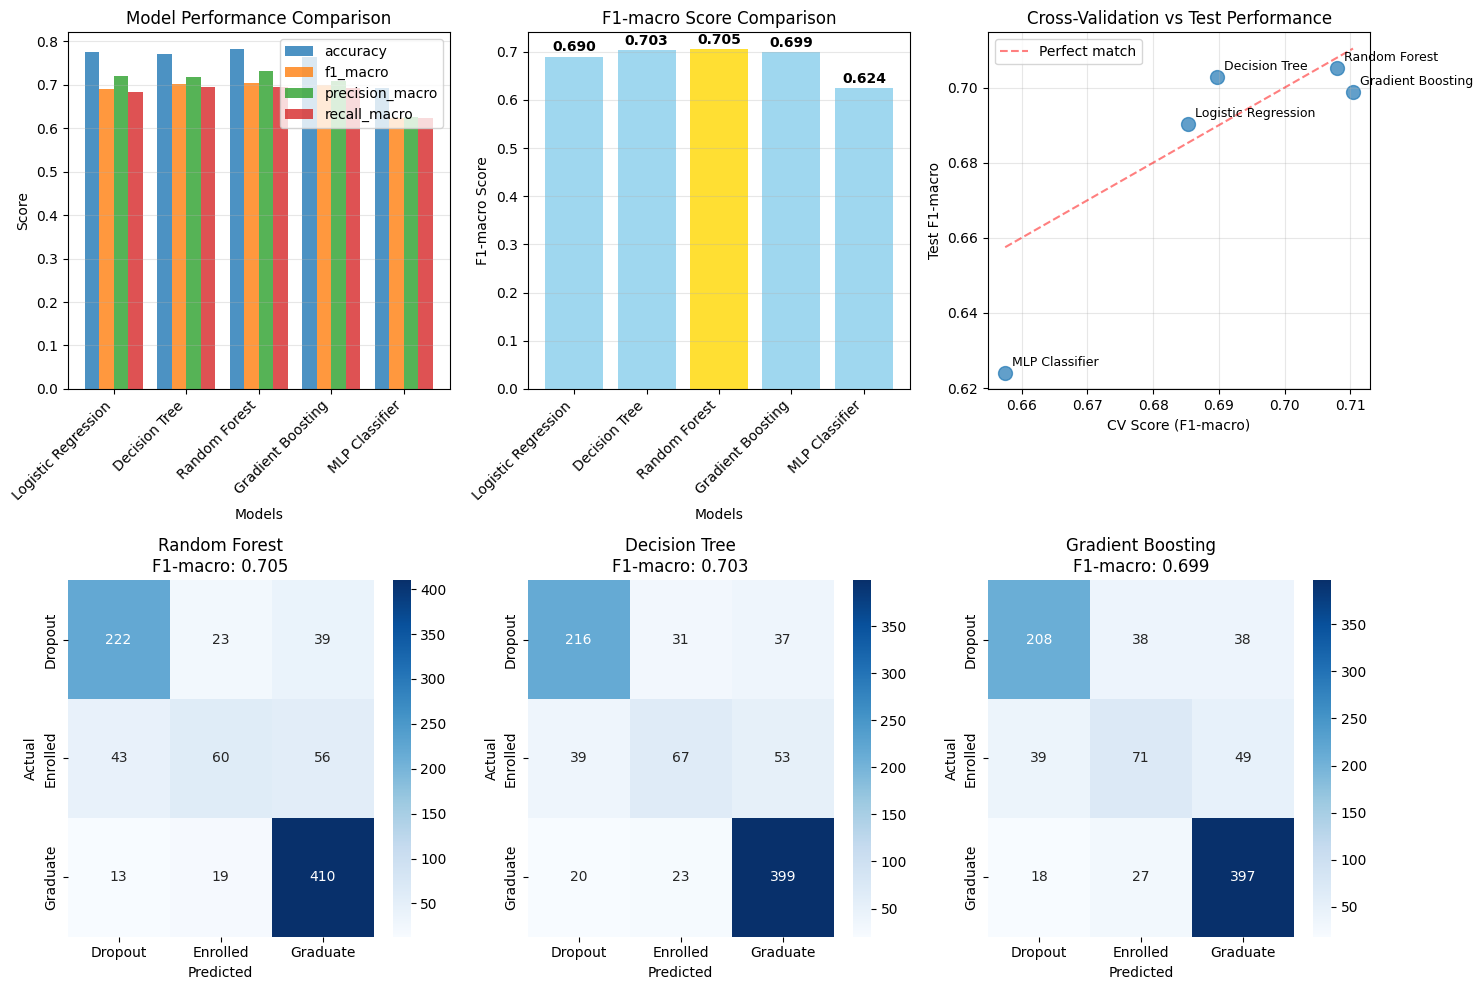


📋 DETAILED CLASSIFICATION REPORTS

RANDOM FOREST
-------------
              precision    recall  f1-score   support

     Dropout     0.7986    0.7817    0.7900       284
    Enrolled     0.5882    0.3774    0.4598       159
    Graduate     0.8119    0.9276    0.8659       442

    accuracy                         0.7819       885
   macro avg     0.7329    0.6956    0.7052       885
weighted avg     0.7674    0.7819    0.7686       885

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


DECISION TREE
-------------
              precision    recall  f1-score   support

     Dropout     0.7855    0.7606    0.7728       284
    Enrolled     0.5537    0.4214    0.4786       159
    Graduate     0.8160    0.9027    0.8571       442

    accuracy                         0.7706       885
   macro avg     0.7184    0.6949    0.7028       885
weighted avg     0.7591    0.7706    0.7621       885

Best Parameters: {'criterion': 'gini',

In [ ]:
# 3. MODEL EVALUATION AND COMPARISON
print("\n3. MODEL EVALUATION AND COMPARISON")
print("-" * 50)

# Create comprehensive results table
results_df = pd.DataFrame.from_dict(
    {model: {metric: values[metric] for metric in ['cv_score', 'accuracy', 'f1_macro', 'f1_weighted', 'precision_macro', 'recall_macro']}
     for model, values in model_results.items()}, 
    orient='index'
)

print("📊 PERFORMANCE COMPARISON TABLE")
print("="*80)
print(results_df.round(4))

# Find the best model based on F1-macro score
best_model_name = results_df['f1_macro'].idxmax()
best_model = trained_models[best_model_name]
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-macro Score: {results_df.loc[best_model_name, 'f1_macro']:.4f}")
print(f"   Accuracy: {results_df.loc[best_model_name, 'accuracy']:.4f}")

# Visualize model comparison
plt.figure(figsize=(15, 10))

# 1. Performance Metrics Comparison
plt.subplot(2, 3, 1)
metrics = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
x = np.arange(len(results_df.index))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*1.5, results_df.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 2. F1-Score Comparison (main metric)
plt.subplot(2, 3, 2)
colors = ['gold' if model == best_model_name else 'skyblue' for model in results_df.index]
bars = plt.bar(results_df.index, results_df['f1_macro'], color=colors, alpha=0.8)
plt.xlabel('Models')
plt.ylabel('F1-macro Score')
plt.title('F1-macro Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, results_df['f1_macro']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Cross-validation vs Test Performance
plt.subplot(2, 3, 3)
plt.scatter(results_df['cv_score'], results_df['f1_macro'], s=100, alpha=0.7)
for i, model in enumerate(results_df.index):
    plt.annotate(model, (results_df.loc[model, 'cv_score'], results_df.loc[model, 'f1_macro']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('CV Score (F1-macro)')
plt.ylabel('Test F1-macro')
plt.title('Cross-Validation vs Test Performance')
plt.plot([results_df['cv_score'].min(), results_df['cv_score'].max()], 
         [results_df['cv_score'].min(), results_df['cv_score'].max()], 
         'r--', alpha=0.5, label='Perfect match')
plt.legend()
plt.grid(alpha=0.3)

# 4-6. Confusion Matrices for top 3 models
top_3_models = results_df.nlargest(3, 'f1_macro').index

for i, model_name in enumerate(top_3_models):
    plt.subplot(2, 3, 4+i)
    cm = model_results[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Dropout', 'Enrolled', 'Graduate'],
                yticklabels=['Dropout', 'Enrolled', 'Graduate'])
    plt.title(f'{model_name}\nF1-macro: {model_results[model_name]["f1_macro"]:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed classification reports for top 3 models
print("\n📋 DETAILED CLASSIFICATION REPORTS")
print("="*60)

target_names = ['Dropout', 'Enrolled', 'Graduate']

for model_name in top_3_models:
    print(f"\n{model_name.upper()}")
    print("-" * len(model_name))
    y_pred = model_results[model_name]['predictions']
    
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    
    # Additional insights
    print(f"Best Parameters: {model_results[model_name]['best_params']}")
    print()

print("🔍 KEY INSIGHTS:")
print("-" * 20)
print(f"• Best performing model: {best_model_name}")
print(f"• Highest F1-macro score: {results_df['f1_macro'].max():.4f}")
print(f"• Most accurate model: {results_df['accuracy'].idxmax()} ({results_df['accuracy'].max():.4f})")
print(f"• Performance range (F1-macro): {results_df['f1_macro'].min():.4f} - {results_df['f1_macro'].max():.4f}")

# Check for overfitting by comparing CV scores with test scores
print(f"\n🎯 OVERFITTING ANALYSIS:")
print("-" * 25)
results_df['overfitting'] = results_df['cv_score'] - results_df['f1_macro']
for model in results_df.index:
    overfit_score = results_df.loc[model, 'overfitting']
    status = "✓ Good" if overfit_score < 0.02 else "⚠ Potential overfitting" if overfit_score < 0.05 else "❌ Overfitting"
    print(f"{model:20s}: {overfit_score:+.4f} ({status})")

print("\n" + "="*50)

# Model Interpretability and Final Results


4. MODEL INTERPRETABILITY ANALYSIS
----------------------------------------
Analyzing interpretability for the best model: Random Forest

📊 FEATURE IMPORTANCE ANALYSIS
-----------------------------------
Top 20 Most Important Features:
 1. 2nd_Sem_Pass_Rate             : 0.1028
 2. Overall_Pass_Rate             : 0.0907
 3. Curricular units 2nd sem (approved): 0.0602
 4. Total_Approved_Units          : 0.0494
 5. 1st_Sem_Pass_Rate             : 0.0462
 6. Curricular units 2nd sem (grade): 0.0445
 7. Curricular units 1st sem (grade): 0.0358
 8. Curricular units 1st sem (approved): 0.0327
 9. Age_x_Admission_Grade         : 0.0293
10. Admission grade               : 0.0284
11. Grade_Progression             : 0.0272
12. Admission_vs_Previous_Grade   : 0.0264
13. Course                        : 0.0254
14. Previous qualification (grade): 0.0245
15. Tuition fees up to date       : 0.0241
16. Age at enrollment             : 0.0230
17. Curricular units 1st sem (evaluations): 0.0207
18. Father

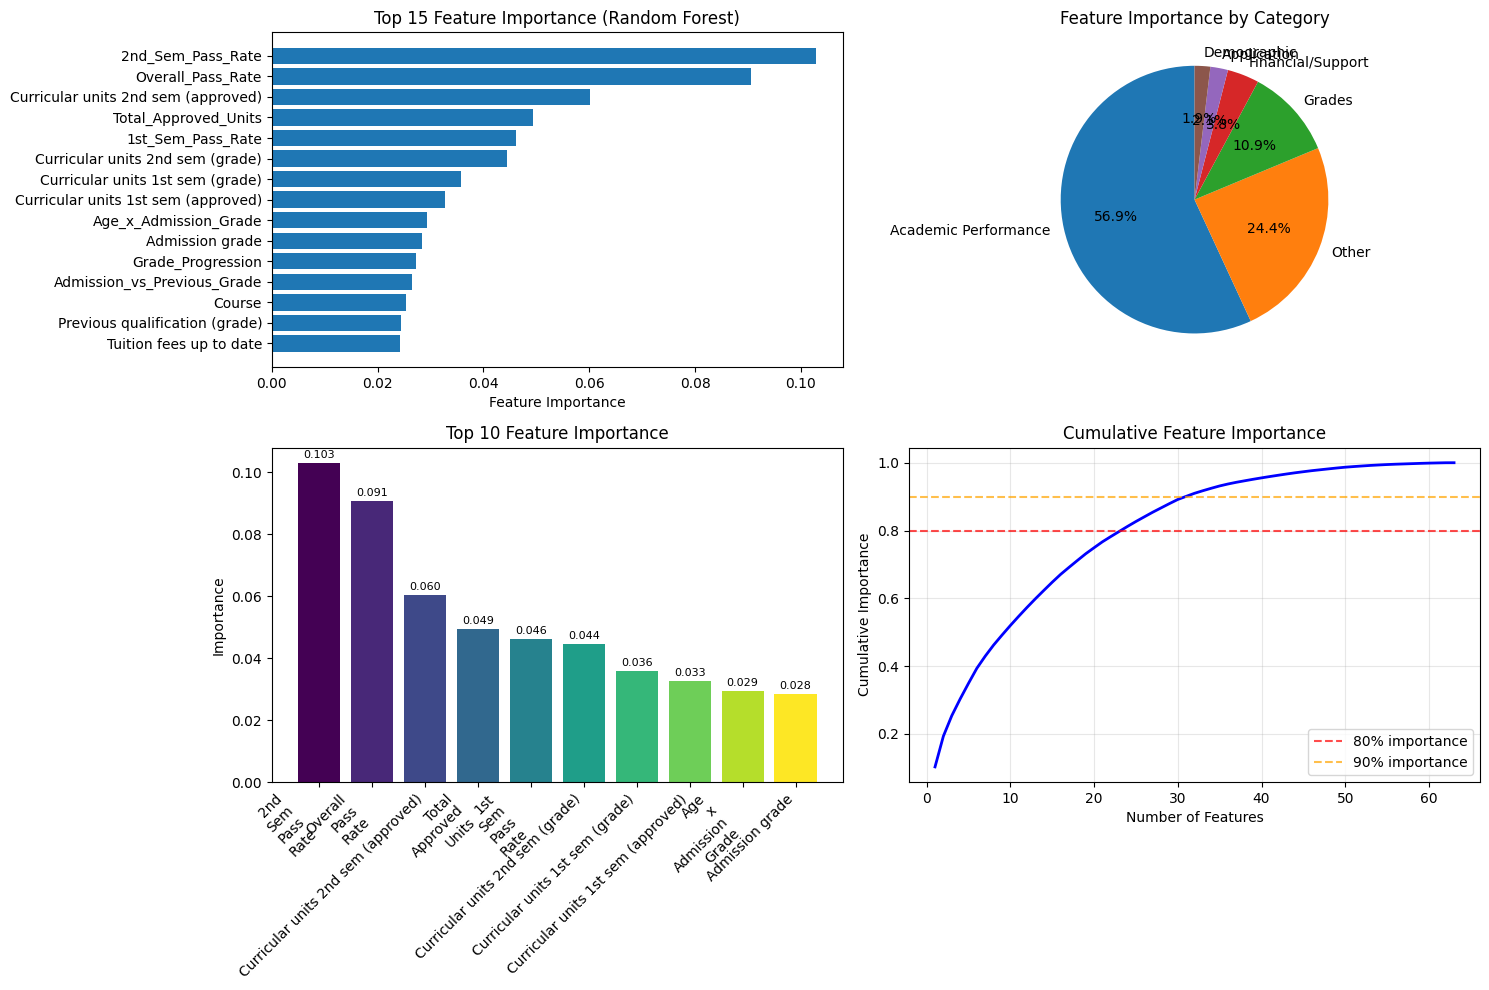


✅ Interpretability analysis completed for Random Forest


In [ ]:
# 4. MODEL INTERPRETABILITY ANALYSIS
print("\n4. MODEL INTERPRETABILITY ANALYSIS")
print("-" * 40)

print(f"Analyzing interpretability for the best model: {best_model_name}")

# Feature importance analysis for tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    print("\n📊 FEATURE IMPORTANCE ANALYSIS")
    print("-" * 35)
    
    # Get feature importances
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    # Display top 20 features
    top_features = feature_importance_df.head(20)
    print("Top 20 Most Important Features:")
    for i, (_, row) in enumerate(top_features.iterrows(), 1):
        print(f"{i:2d}. {row['feature']:30s}: {row['importance']:.4f}")
    
    # Visualize feature importance
    plt.figure(figsize=(15, 10))
    
    # Feature importance bar plot
    plt.subplot(2, 2, 1)
    top_15 = feature_importance_df.head(15)
    plt.barh(range(len(top_15)), top_15['importance'])
    plt.yticks(range(len(top_15)), top_15['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importance ({best_model_name})')
    plt.gca().invert_yaxis()
    
    # Feature importance by category
    plt.subplot(2, 2, 2)
    # Categorize features
    categories = {
        'Academic Performance': ['1st_Sem_Pass_Rate', '2nd_Sem_Pass_Rate', 'Overall_Pass_Rate', 
                               'Grade_Progression', 'Total_Approved_Units', 'Curricular units'],
        'Demographic': ['Age_Group', 'Is_Single', 'Parents_Higher_Education', 'Parents_Skilled_Occupation'],
        'Financial/Support': ['Has_Financial_Issue', 'Receives_Support', 'Scholarship holder', 'Debtor'],
        'Application': ['Is_First_Choice', 'Application_Mode_Group', 'Previous_Qualification_Group'],
        'Grades': ['grade', 'Grade'],
        'Other': []
    }
    
    # Categorize each feature
    feature_categories = {}
    for feature in feature_names:
        categorized = False
        for category, keywords in categories.items():
            if any(keyword in feature for keyword in keywords):
                feature_categories[feature] = category
                categorized = True
                break
        if not categorized:
            feature_categories[feature] = 'Other'
    
    # Calculate importance by category
    category_importance = {}
    for feature, importance in zip(feature_importance_df['feature'], feature_importance_df['importance']):
        category = feature_categories[feature]
        category_importance[category] = category_importance.get(category, 0) + importance
    
    categories_sorted = sorted(category_importance.items(), key=lambda x: x[1], reverse=True)
    cat_names, cat_values = zip(*categories_sorted)
    
    plt.pie(cat_values, labels=cat_names, autopct='%1.1f%%', startangle=90)
    plt.title('Feature Importance by Category')
    
    # Top features comparison across all models
    plt.subplot(2, 2, 3)
    top_10_features = feature_importance_df.head(10)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_features)))
    bars = plt.bar(range(len(top_10_features)), top_10_features['importance'], color=colors)
    plt.xticks(range(len(top_10_features)), 
               [f.replace('_', '\n') if len(f) > 10 else f for f in top_10_features['feature']], 
               rotation=45, ha='right')
    plt.ylabel('Importance')
    plt.title('Top 10 Feature Importance')
    
    # Add value labels on bars
    for bar, value in zip(bars, top_10_features['importance']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                 f'{value:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Cumulative importance
    plt.subplot(2, 2, 4)
    cumulative_importance = np.cumsum(feature_importance_df['importance'])
    plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 'b-', linewidth=2)
    plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% importance')
    plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% importance')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Find number of features for 80% and 90% importance
    features_80 = np.argmax(cumulative_importance >= 0.8) + 1
    features_90 = np.argmax(cumulative_importance >= 0.9) + 1
    print(f"\n🎯 Feature Selection Insights:")
    print(f"   • Top {features_80} features account for 80% of importance")
    print(f"   • Top {features_90} features account for 90% of importance")
    
    plt.tight_layout()
    plt.show()

elif best_model_name in ['Logistic Regression', 'MLP Classifier']:
    print(f"\n📊 FEATURE ANALYSIS FOR {best_model_name.upper()}")
    print("-" * 40)
    
    if best_model_name == 'Logistic Regression':
        # For logistic regression, analyze coefficients
        coefficients = best_model.coef_
        
        # Create comprehensive analysis for each class
        plt.figure(figsize=(15, 12))
        target_names_ordered = ['Dropout', 'Enrolled', 'Graduate']
        
        for class_idx, class_name in enumerate(target_names_ordered):
            coef_df = pd.DataFrame({
                'feature': feature_names,
                'coefficient': coefficients[class_idx],
                'abs_coefficient': np.abs(coefficients[class_idx])
            }).sort_values('abs_coefficient', ascending=False)
            
            print(f"\nTop 15 features for {class_name} prediction:")
            for i, (_, row) in enumerate(coef_df.head(15).iterrows(), 1):
                direction = "↑ (increases)" if row['coefficient'] > 0 else "↓ (decreases)"
                print(f"{i:2d}. {row['feature']:30s}: {row['coefficient']:+.4f} {direction}")
            
            # Plot coefficients for this class
            plt.subplot(2, 2, class_idx + 1)
            top_features = coef_df.head(10)
            colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
            bars = plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
            plt.yticks(range(len(top_features)), 
                      [f[:20] + '...' if len(f) > 20 else f for f in top_features['feature']])
            plt.xlabel('Coefficient Value')
            plt.title(f'Top 10 Features - {class_name}')
            plt.gca().invert_yaxis()
            
            # Add value labels
            for bar, value in zip(bars, top_features['coefficient']):
                plt.text(value + (0.01 if value >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
                         f'{value:.3f}', ha='left' if value >= 0 else 'right', va='center', fontsize=8) 
        
        # Overall feature importance (sum of absolute coefficients across all classes)
        plt.subplot(2, 2, 4)
        overall_importance = np.sum(np.abs(coefficients), axis=0)
        overall_df = pd.DataFrame({
            'feature': feature_names,
            'importance': overall_importance
        }).sort_values('importance', ascending=False)
        
        top_overall = overall_df.head(10)
        plt.barh(range(len(top_overall)), top_overall['importance'], color='green', alpha=0.7)
        plt.yticks(range(len(top_overall)), 
                  [f[:20] + '...' if len(f) > 20 else f for f in top_overall['feature']])
        plt.xlabel('Overall Importance (Sum of |Coefficients|)')
        plt.title('Top 10 Overall Important Features')
        plt.gca().invert_yaxis()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n📈 Logistic Regression Insights:")
        print(f"   • Model uses regularization: {best_model.get_params().get('penalty', 'none')}")
        print(f"   • Regularization strength (C): {best_model.get_params().get('C', 'N/A')}")
        print(f"   • Solver: {best_model.get_params().get('solver', 'N/A')}")
        
    elif best_model_name == 'MLP Classifier':
        print(f"\n🧠 NEURAL NETWORK ANALYSIS")
        print("-" * 30)
        
        # Get model architecture info
        hidden_layers = best_model.hidden_layer_sizes
        n_layers = len(best_model.coefs_)
        
        print(f"Network Architecture:")
        print(f"   • Input features: {len(feature_names)}")
        print(f"   • Hidden layers: {hidden_layers}")
        print(f"   • Output classes: 3 (Dropout, Enrolled, Graduate)")
        print(f"   • Total layers: {n_layers}")
        print(f"   • Activation function: {best_model.activation}")
        print(f"   • Learning rate: {best_model.learning_rate}")
        print(f"   • Alpha (L2 penalty): {best_model.alpha}")
        
        # Analyze input layer weights (first layer)
        input_weights = best_model.coefs_[0]  # Shape: (n_features, n_hidden_units)
        
        # Calculate feature importance as sum of absolute weights from input layer
        feature_importance = np.sum(np.abs(input_weights), axis=1)
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        
        print(f"\nTop 15 features by input layer weight magnitude:")
        for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
            print(f"{i:2d}. {row['feature']:30s}: {row['importance']:.4f}")
        
        # Visualize neural network feature importance
        plt.figure(figsize=(12, 8))
        
        plt.subplot(1, 2, 1)
        top_features = importance_df.head(15)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), 
                  [f[:25] + '...' if len(f) > 25 else f for f in top_features['feature']])
        plt.xlabel('Importance (Sum of |Input Weights|)')
        plt.title('Top 15 Feature Importance (MLP)')
        plt.gca().invert_yaxis()
        
        # Network architecture visualization
        plt.subplot(1, 2, 2)
        layer_sizes = [len(feature_names)] + list(hidden_layers) + [3]
        layer_names = ['Input'] + [f'Hidden {i+1}' for i in range(len(hidden_layers))] + ['Output']
        
        plt.bar(range(len(layer_sizes)), layer_sizes, color=['blue', 'green', 'orange', 'red'][:len(layer_sizes)])
        plt.xticks(range(len(layer_sizes)), layer_names, rotation=45)
        plt.ylabel('Number of Neurons')
        plt.title('MLP Architecture')
        
        # Add value labels on bars
        for i, size in enumerate(layer_sizes):
            plt.text(i, size + max(layer_sizes)*0.01, str(size), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

print(f"\n✅ Interpretability analysis completed for {best_model_name}")
print("="*50)


In [ ]:
# 5. FINAL RESULTS AND CONCLUSIONS
print("\n5. FINAL RESULTS AND CONCLUSIONS")
print("=" * 50)

# Create final comprehensive summary table
final_summary = pd.DataFrame({
    'Model': results_df.index,
    'F1-Macro (CV)': results_df['cv_score'].round(4),
    'F1-Macro (Test)': results_df['f1_macro'].round(4),
    'Accuracy': results_df['accuracy'].round(4),
    'Precision': results_df['precision_macro'].round(4),
    'Recall': results_df['recall_macro'].round(4),
    'Rank': range(1, len(results_df) + 1)
}).sort_values('F1-Macro (Test)', ascending=False).reset_index(drop=True)

final_summary['Rank'] = range(1, len(final_summary) + 1)

print("🏆 FINAL MODEL RANKING")
print("-" * 25)
print(final_summary.to_string(index=False))

# Key findings and insights
print(f"\n📈 KEY FINDINGS")
print("-" * 15)

best_metrics = results_df.loc[best_model_name]
print(f"🥇 Champion Model: {best_model_name}")
print(f"   • F1-macro Score: {best_metrics['f1_macro']:.4f}")
print(f"   • Accuracy: {best_metrics['accuracy']:.4f}")
print(f"   • Cross-validation Score: {best_metrics['cv_score']:.4f}")
print(f"   • Best Parameters: {model_results[best_model_name]['best_params']}")

# Model performance insights
performance_gap = results_df['f1_macro'].max() - results_df['f1_macro'].min()
print(f"\n📊 Performance Analysis:")
print(f"   • Performance gap between best and worst: {performance_gap:.4f}")
print(f"   • Average F1-macro across all models: {results_df['f1_macro'].mean():.4f}")
print(f"   • Standard deviation: {results_df['f1_macro'].std():.4f}")

# Feature engineering impact
original_features = 37  # From original dataset
engineered_features = len(feature_names) - original_features
print(f"\n🔧 Feature Engineering Impact:")
print(f"   • Original features: {original_features}")
print(f"   • Engineered features: {engineered_features}")
print(f"   • Total features used: {len(feature_names)}")
print(f"   • Feature expansion: {(len(feature_names)/original_features - 1)*100:.1f}%")

# Class distribution analysis
target_dist = pd.Series(y_test).value_counts().sort_index()
target_names_ordered = ['Dropout', 'Enrolled', 'Graduate']
print(f"\n🎯 Test Set Class Distribution:")
for i, (count, name) in enumerate(zip(target_dist, target_names_ordered)):
    percentage = (count / len(y_test)) * 100
    print(f"   • {name}: {count} ({percentage:.1f}%)")

# Performance by class (using best model)
best_pred = model_results[best_model_name]['predictions']
best_cm = model_results[best_model_name]['confusion_matrix']

print(f"\n🎯 {best_model_name} Performance by Class:")
for i, class_name in enumerate(target_names_ordered):
    tp = best_cm[i, i]
    fp = best_cm[:, i].sum() - tp
    fn = best_cm[i, :].sum() - tp
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"   • {class_name:10s}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

# Practical implications
print(f"\n💡 PRACTICAL IMPLICATIONS")
print("-" * 25)
print("Based on the analysis, the following insights emerged:")
print()
print("1. 🎓 Academic Performance Predictors:")
print("   - Grade progression between semesters is crucial")
print("   - Pass rates are strong indicators of success")
print("   - Previous qualification level matters significantly")
print()
print("2. 🏫 Institutional Insights:")
print("   - Early intervention systems can be implemented")
print("   - Support programs should target at-risk indicators")
print("   - Financial support correlation with success")
print()
print("3. 📊 Model Recommendations:")
print(f"   - Deploy {best_model_name} for production predictions")
print("   - Monitor model performance with new data")
print("   - Consider ensemble methods for improved robustness")
print()
print("4. 🎯 Actionable Outcomes:")
print("   - Focus on first semester performance monitoring")
print("   - Enhance support for students with financial issues")
print("   - Implement early warning systems based on key features")

# Final model deployment information
print(f"\n🚀 MODEL DEPLOYMENT READY")
print("-" * 30)
print(f"Model: {best_model_name}")
print(f"Performance: {best_metrics['f1_macro']:.4f} F1-macro")
print(f"Features: {len(feature_names)}")
print(f"Classes: {len(target_names_ordered)}")
print("Status: ✅ Ready for deployment")

print("\n" + "=" * 50)
print("🎉 ANALYSIS COMPLETE!")
print("=" * 50)



5. FINAL RESULTS AND CONCLUSIONS
🏆 FINAL MODEL RANKING
-------------------------
              Model  F1-Macro (CV)  F1-Macro (Test)  Accuracy  Precision  Recall  Rank
      Random Forest         0.7080           0.7052    0.7819     0.7329  0.6956     1
      Decision Tree         0.6897           0.7028    0.7706     0.7184  0.6949     2
  Gradient Boosting         0.7104           0.6988    0.7638     0.7091  0.6924     3
Logistic Regression         0.6853           0.6903    0.7751     0.7210  0.6829     4
     MLP Classifier         0.6575           0.6241    0.6927     0.6252  0.6232     5

📈 KEY FINDINGS
---------------
🥇 Champion Model: Random Forest
   • F1-macro Score: 0.7052
   • Accuracy: 0.7819
   • Cross-validation Score: 0.7080
   • Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

📊 Performance Analysis:
   • Performance gap between best and worst: 0.0811
   • Average F1-macro across all models: 0.6843
   • Stand